### Importing Required packages

In [5]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#TamilNadu, Manipur, Chandigarh, Tripura, UttarPradesh, ArunachalPradesh (States to focus on)

In [6]:
#pd.set_option('display.max_rows', 50)

### Downloading datasets

In [7]:
events = pd.read_csv("C://Users/Shikha/Desktop/Capstone Project Data Analytics/events_data.csv")

In [8]:
events.shape

(3252950, 7)

In [9]:
events.head(100)

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
...,...,...,...,...,...,...,...
95,308714,-3.541650e+18,2016-05-01 14:35:55,77.616825,13.048771,Bangalore,Karnataka
96,1442144,-7.015244e+18,2016-05-03 02:23:14,78.544670,17.435525,Hyderabad,Telangana
97,596061,1.993717e+18,2016-05-01 07:11:05,72.919793,18.981278,Mumbai,Maharashtra
98,1035495,5.425313e+18,2016-05-05 10:55:48,75.888745,22.737506,Indore,MadhyaPradesh


In [10]:
events.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     3252950 non-null int64
device_id    3252497 non-null float64
timestamp    3252950 non-null object
longitude    3252527 non-null float64
latitude     3252527 non-null float64
city         3252950 non-null object
state        3252573 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [11]:
events.describe()

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


### Filling in null values for State using geocoder

In [12]:
events_copy1=events.copy()

In [13]:
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geolocationstate")

In [14]:
def state(coord):
    location = geolocator.reverse(coord, exactly_one=True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    #country = address.get('country', '')
    return  state
state("69.2075,34.5553")

'Мурманская область'

In [15]:
State_null = pd.isnull(events_copy1["state"])

In [16]:
events_copy1[State_null]

,event_id,device_id,timestamp,longitude,latitude,city,state
2931,706554,-5.829328e+18,2016-05-05 16:58:46,73.851671,18.593313,Pune,NaN
16243,1918653,3.137054e+18,2016-05-03 00:46:10,83.326714,17.829748,Visakhapatnam,NaN
26956,1068940,-1.752057e+18,2016-05-04 16:09:17,75.930969,22.818845,Indore,NaN
30889,2164200,-3.945827e+17,2016-05-04 19:33:09,83.366564,17.757190,Visakhapatnam,NaN
32685,460124,5.536513e+18,2016-05-01 21:30:10,80.359796,13.128174,Chennai,NaN
...,...,...,...,...,...,...,...
3210326,1070365,-5.858653e+18,2016-05-07 17:03:06,88.619418,25.484459,Gangarampur,NaN
3226848,145171,4.620271e+18,2016-05-07 20:38:45,87.812710,22.957980,Arambagh,NaN
3235317,210361,-8.340098e+18,2016-05-05 20:53:20,77.305988,28.688980,Delhi,NaN
3236931,2738361,4.113023e+18,2016-05-02 18:15:04,75.906533,22.732515,Indore,NaN


In [17]:
events_copy1['coord'] = events_copy1[State_null].apply(lambda x:'%s,%s' % (x['latitude'],x['longitude']),axis=1)

In [18]:
events_copy1['coord']=events_copy1[State_null]['coord'].apply(state)

In [19]:
events_copy1.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 8 columns):
event_id     3252950 non-null int64
device_id    3252497 non-null float64
timestamp    3252950 non-null object
longitude    3252527 non-null float64
latitude     3252527 non-null float64
city         3252950 non-null object
state        3252573 non-null object
coord        377 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 198.5+ MB


In [20]:
events_copy1["state"] = events_copy1["state"].fillna(events_copy1["coord"])

In [21]:
events_copy1.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 8 columns):
event_id     3252950 non-null int64
device_id    3252497 non-null float64
timestamp    3252950 non-null object
longitude    3252527 non-null float64
latitude     3252527 non-null float64
city         3252950 non-null object
state        3252950 non-null object
coord        377 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 198.5+ MB


In [22]:
events_copy1.drop(['coord'],axis=1,inplace=True)

In [23]:
events_copy1[events_copy1.state=='Uttar Pradesh'][events_copy1.city =='Delhi']  #geocode has filled wrong state for Delhi for 41 null values so will nto include 'Uttar Pradesh' in the subset

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,event_id,device_id,timestamp,longitude,latitude,city,state
58711,1586328,-6.242501e+18,2016-05-02 18:25:36,77.293991,28.749820,Delhi,Uttar Pradesh
146029,191851,-6.242501e+18,2016-05-02 05:50:53,77.293991,28.749820,Delhi,Uttar Pradesh
219532,341684,-6.242501e+18,2016-05-02 08:37:46,77.293991,28.749820,Delhi,Uttar Pradesh
239140,1937248,-3.746249e+18,2016-05-05 15:46:12,77.264729,28.756094,Delhi,Uttar Pradesh
352345,1344292,-3.746249e+18,2016-05-05 17:54:07,77.264729,28.756094,Delhi,Uttar Pradesh
355420,2010015,-3.746249e+18,2016-05-05 22:13:17,77.264729,28.756094,Delhi,Uttar Pradesh
439850,983707,-6.242501e+18,2016-05-03 10:25:17,77.293991,28.749820,Delhi,Uttar Pradesh
541227,227479,-3.746249e+18,2016-05-05 14:54:50,77.264729,28.756094,Delhi,Uttar Pradesh
592266,1009753,-3.746249e+18,2016-05-05 10:23:05,77.264729,28.756094,Delhi,Uttar Pradesh
606584,1829155,-3.746249e+18,2016-05-04 14:06:25,77.264729,28.756094,Delhi,Uttar Pradesh


In [24]:
events.groupby(['state']).count()

,event_id,device_id,timestamp,longitude,latitude,city
state,,,,,,
AndamanandNicobarIslands,1515,1515,1515,1515,1515,1515
AndhraPradesh,321332,321263,321332,321269,321269,321332
ArunachalPradesh,608,608,608,608,608,608
Assam,12021,12021,12021,12021,12021,12021
Bihar,35472,35472,35472,35444,35444,35472
Chandigarh,894,894,894,894,894,894
Chhattisgarh,9754,9754,9754,9754,9754,9754
Delhi,751733,751664,751733,751670,751670,751733
Goa,3250,3250,3250,3250,3250,3250


In [25]:
events_copy1.groupby(['state']).count()

,event_id,device_id,timestamp,longitude,latitude,city
state,,,,,,
AndamanandNicobarIslands,1515,1515,1515,1515,1515,1515
Andhra Pradesh,47,47,47,47,47,47
AndhraPradesh,321332,321263,321332,321269,321269,321332
ArunachalPradesh,608,608,608,608,608,608
Assam,12021,12021,12021,12021,12021,12021
Bihar,35472,35472,35472,35444,35444,35472
Chandigarh,894,894,894,894,894,894
Chhattisgarh,9754,9754,9754,9754,9754,9754
Delhi,751756,751687,751756,751693,751693,751756


In [26]:
events_copy1['state'] = events_copy1['state'].replace(['Tamil Nadu'],['TamilNadu'])

In [27]:
events_copy1.groupby(['state']).count()

,event_id,device_id,timestamp,longitude,latitude,city
state,,,,,,
AndamanandNicobarIslands,1515,1515,1515,1515,1515,1515
Andhra Pradesh,47,47,47,47,47,47
AndhraPradesh,321332,321263,321332,321269,321269,321332
ArunachalPradesh,608,608,608,608,608,608
Assam,12021,12021,12021,12021,12021,12021
Bihar,35472,35472,35472,35444,35444,35472
Chandigarh,894,894,894,894,894,894
Chhattisgarh,9754,9754,9754,9754,9754,9754
Delhi,751756,751687,751756,751693,751693,751756


In [28]:
events_copy1.describe(include='all')

,event_id,device_id,timestamp,longitude,latitude,city,state
count,3.252950e+06,3.252497e+06,3252950,3.252527e+06,3.252527e+06,3252950,3252950
unique,NaN,NaN,588126,NaN,NaN,933,36
top,NaN,NaN,2016-05-03 10:00:03,NaN,NaN,Delhi,Delhi
freq,NaN,NaN,43,NaN,NaN,744276,751756
mean,1.626476e+06,1.012200e+17,NaN,7.815868e+01,2.168851e+01,NaN,NaN
std,9.390459e+05,5.316758e+18,NaN,4.235570e+00,5.789111e+00,NaN,NaN
min,1.000000e+00,-9.222957e+18,NaN,1.256700e+01,8.190110e+00,NaN,NaN
25%,8.132382e+05,-4.540611e+18,NaN,7.583543e+01,1.780171e+01,NaN,NaN
50%,1.626476e+06,1.726820e+17,NaN,7.726814e+01,2.216454e+01,NaN,NaN
75%,2.439713e+06,4.861813e+18,NaN,8.031916e+01,2.868278e+01,NaN,NaN


In [29]:
events1=events_copy1[events_copy1['state'].isin(['TamilNadu', 'Manipur', 'Chandigarh', 'Tripura', 'UttarPradesh', 'ArunachalPradesh'])]

In [30]:
events1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 3 to 3252949
Data columns (total 7 columns):
event_id     534462 non-null int64
device_id    534399 non-null float64
timestamp    534462 non-null object
longitude    534399 non-null float64
latitude     534399 non-null float64
city         534462 non-null object
state        534462 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 32.6+ MB


### Filling in null values for Latitude and longitude 

In [31]:
lat_null=pd.isnull(events1['latitude'])
long_null=pd.isnull(events['longitude'])

In [32]:
events1[lat_null]

,event_id,device_id,timestamp,longitude,latitude,city,state
16038,926804,7.983871e+18,2016-05-03 12:29:47,NaN,NaN,Chennai,TamilNadu
45030,512493,7.983871e+18,2016-05-03 11:59:39,NaN,NaN,Chennai,TamilNadu
96496,3186309,7.662139e+18,2016-05-05 21:00:34,NaN,NaN,Chennai,TamilNadu
118629,53798,7.983871e+18,2016-05-04 18:34:29,NaN,NaN,Chennai,TamilNadu
125853,918193,5.731369e+18,2016-05-04 04:35:06,NaN,NaN,Chennai,TamilNadu
...,...,...,...,...,...,...,...
2971236,759616,5.731369e+18,2016-05-02 05:33:52,NaN,NaN,Chennai,TamilNadu
2990842,2289878,7.662139e+18,2016-05-07 13:13:43,NaN,NaN,Chennai,TamilNadu
3049691,1013566,7.983871e+18,2016-05-05 13:20:52,NaN,NaN,Chennai,TamilNadu
3089101,940277,7.983871e+18,2016-05-03 22:37:41,NaN,NaN,Chennai,TamilNadu


In [33]:
events1[lat_null].groupby(['device_id']).count()

,event_id,timestamp,longitude,latitude,city,state
device_id,,,,,,
5.731369e+18,21,21,0,0,21,21
7.662139e+18,21,21,0,0,21,21
7.983871e+18,21,21,0,0,21,21


In [34]:
events1[lat_null].device_id.astype(np.int64)

16038      7983871429718484992
45030      7983871429718484992
96496      7662139143719919616
118629     7983871429718484992
125853     5731369272434022400
                  ...         
2971236    5731369272434022400
2990842    7662139143719919616
3049691    7983871429718484992
3089101    7983871429718484992
3174446    7983871429718484992
Name: device_id, Length: 63, dtype: int64

In [35]:
events1[long_null].groupby(['device_id','city'])['city'].count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


device_id     city   
5.731369e+18  Chennai    21
7.662139e+18  Chennai    21
7.983871e+18  Chennai    21
Name: city, dtype: int64

In [36]:
indices_lat_long= events1[events1['device_id'].isin([5731369272434022400,7662139143719919616,7983871429718484992])]

In [37]:
indices_lat_long.head(10)

,event_id,device_id,timestamp,longitude,latitude,city,state
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
14,460645,7.983871e+18,2016-05-04 21:04:40,80.335435,13.189053,Chennai,TamilNadu
378,3115822,7.983871e+18,2016-05-01 17:17:04,80.335435,13.189053,Chennai,TamilNadu
399,2520700,7.983871e+18,2016-05-02 15:53:05,80.335435,13.189053,Chennai,TamilNadu
472,2286316,7.983871e+18,2016-05-02 11:11:07,80.335435,13.189053,Chennai,TamilNadu
1120,2682848,7.662139e+18,2016-05-05 22:29:33,80.309272,13.149176,Chennai,TamilNadu
1222,1547005,7.983871e+18,2016-05-05 19:27:06,80.335435,13.189053,Chennai,TamilNadu
1301,2248848,7.662139e+18,2016-05-02 21:22:07,80.309272,13.149176,Chennai,TamilNadu
1527,2987422,7.983871e+18,2016-05-02 02:34:59,80.335435,13.189053,Chennai,TamilNadu
2692,370888,7.662139e+18,2016-05-02 08:59:47,80.309272,13.149176,Chennai,TamilNadu


### Indices for device_ids 5.731369e+18, 7.983871e+18 and 7.662139e+18 are  3, 14 and 1120 - using the same for backfilling null values for latitude and longitude

In [38]:
events1[lat_null]

,event_id,device_id,timestamp,longitude,latitude,city,state
16038,926804,7.983871e+18,2016-05-03 12:29:47,NaN,NaN,Chennai,TamilNadu
45030,512493,7.983871e+18,2016-05-03 11:59:39,NaN,NaN,Chennai,TamilNadu
96496,3186309,7.662139e+18,2016-05-05 21:00:34,NaN,NaN,Chennai,TamilNadu
118629,53798,7.983871e+18,2016-05-04 18:34:29,NaN,NaN,Chennai,TamilNadu
125853,918193,5.731369e+18,2016-05-04 04:35:06,NaN,NaN,Chennai,TamilNadu
...,...,...,...,...,...,...,...
2971236,759616,5.731369e+18,2016-05-02 05:33:52,NaN,NaN,Chennai,TamilNadu
2990842,2289878,7.662139e+18,2016-05-07 13:13:43,NaN,NaN,Chennai,TamilNadu
3049691,1013566,7.983871e+18,2016-05-05 13:20:52,NaN,NaN,Chennai,TamilNadu
3089101,940277,7.983871e+18,2016-05-03 22:37:41,NaN,NaN,Chennai,TamilNadu


In [39]:
events1.update(events1['latitude'].loc[events1['device_id']==5731369272434022400].bfill().fillna(3))

C:\Users\Shikha\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:5819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [40]:
events1.update(events1['longitude'].loc[events1['device_id']==5731369272434022400].ffill().fillna(3))

In [41]:
events1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 3 to 3252949
Data columns (total 7 columns):
event_id     534462 non-null int64
device_id    534399 non-null float64
timestamp    534462 non-null object
longitude    534420 non-null float64
latitude     534420 non-null float64
city         534462 non-null object
state        534462 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 32.6+ MB


In [42]:
events1.update(events1['latitude'].loc[events1['device_id']== 7983871429718484992].bfill().fillna(14))

In [43]:
events1.update(events1['longitude'].loc[events1['device_id']== 7983871429718484992].bfill().fillna(14))

In [44]:
events1.update(events1['latitude'].loc[events1['device_id']== 7662139143719919616].bfill().fillna(1120))

In [45]:
events1.update(events1['longitude'].loc[events1['device_id']== 7662139143719919616].bfill().fillna(1120))

In [46]:
events1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 3 to 3252949
Data columns (total 7 columns):
event_id     534462 non-null int64
device_id    534399 non-null float64
timestamp    534462 non-null object
longitude    534462 non-null float64
latitude     534462 non-null float64
city         534462 non-null object
state        534462 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 32.6+ MB


### Filling in null device id

In [47]:
device_null=pd.isnull(events1['device_id'])
events1[device_null]

,event_id,device_id,timestamp,longitude,latitude,city,state
142363,2376755,NaN,2016-05-03 20:35:22,80.343613,13.153332,Chennai,TamilNadu
183533,477494,NaN,2016-05-02 01:29:26,80.309272,13.149176,Chennai,TamilNadu
242619,857347,NaN,2016-05-02 18:28:16,80.335435,13.189053,Chennai,TamilNadu
279646,2750492,NaN,2016-05-07 21:55:46,80.309272,13.149176,Chennai,TamilNadu
311225,1158454,NaN,2016-05-07 19:25:11,80.309272,13.149176,Chennai,TamilNadu
...,...,...,...,...,...,...,...
3070773,2815958,NaN,2016-05-04 22:56:27,80.335435,13.189053,Chennai,TamilNadu
3093854,1128015,NaN,2016-05-01 21:16:50,80.335435,13.189053,Chennai,TamilNadu
3123363,58816,NaN,2016-05-03 21:00:59,80.309272,13.149176,Chennai,TamilNadu
3130259,2949050,NaN,2016-05-04 16:55:44,80.343613,13.153332,Chennai,TamilNadu


In [48]:
events1[device_null].groupby(['latitude']).count()

,event_id,device_id,timestamp,longitude,city,state
latitude,,,,,,
13.149176,21,0,21,21,21,21
13.153332,21,0,21,21,21,21
13.189053,21,0,21,21,21,21


In [49]:
events1[device_null].groupby(['longitude']).count()

,event_id,device_id,timestamp,latitude,city,state
longitude,,,,,,
80.309272,21,0,21,21,21,21
80.335435,21,0,21,21,21,21
80.343613,21,0,21,21,21,21


In [50]:
deviceid= events1[events1['latitude'].isin(['13.149176','13.153332','13.189053'])]

In [51]:
deviceid.head(10)

,event_id,device_id,timestamp,longitude,latitude,city,state
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
14,460645,7.983871e+18,2016-05-04 21:04:40,80.335435,13.189053,Chennai,TamilNadu
378,3115822,7.983871e+18,2016-05-01 17:17:04,80.335435,13.189053,Chennai,TamilNadu
399,2520700,7.983871e+18,2016-05-02 15:53:05,80.335435,13.189053,Chennai,TamilNadu
472,2286316,7.983871e+18,2016-05-02 11:11:07,80.335435,13.189053,Chennai,TamilNadu
1120,2682848,7.662139e+18,2016-05-05 22:29:33,80.309272,13.149176,Chennai,TamilNadu
1222,1547005,7.983871e+18,2016-05-05 19:27:06,80.335435,13.189053,Chennai,TamilNadu
1301,2248848,7.662139e+18,2016-05-02 21:22:07,80.309272,13.149176,Chennai,TamilNadu
1527,2987422,7.983871e+18,2016-05-02 02:34:59,80.335435,13.189053,Chennai,TamilNadu
2692,370888,7.662139e+18,2016-05-02 08:59:47,80.309272,13.149176,Chennai,TamilNadu


### Indices for three latitude  values 13.149176,13.153332,13.189053 are 1120,3 and 14 respectively.  Using these to fill null values using back fill

In [52]:
events2=events1.copy()

In [53]:
events2.update(events2['device_id'].loc[events2['latitude'].isin([13.153332])].ffill().fillna(3))

In [54]:
events2.update(events2['device_id'].loc[events2['latitude']==13.149176].ffill().fillna(1120))

In [55]:
events2.update(events2['device_id'].loc[events2['latitude']==13.189053].ffill().fillna(14))

In [56]:
events2.loc[183533]

event_id                  477494
device_id            7.66214e+18
timestamp    2016-05-02 01:29:26
longitude                80.3093
latitude                 13.1492
city                     Chennai
state                  TamilNadu
Name: 183533, dtype: object

In [57]:
events2[device_null].groupby(['state']).count()

,event_id,device_id,timestamp,longitude,latitude,city
state,,,,,,
TamilNadu,63,63,63,63,63,63


In [58]:
events2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 3 to 3252949
Data columns (total 7 columns):
event_id     534462 non-null int64
device_id    534462 non-null float64
timestamp    534462 non-null object
longitude    534462 non-null float64
latitude     534462 non-null float64
city         534462 non-null object
state        534462 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 52.6+ MB


In [59]:
events2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 3 to 3252949
Data columns (total 7 columns):
event_id     534462 non-null int64
device_id    534462 non-null float64
timestamp    534462 non-null object
longitude    534462 non-null float64
latitude     534462 non-null float64
city         534462 non-null object
state        534462 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 52.6+ MB


In [60]:
events2[device_null]

,event_id,device_id,timestamp,longitude,latitude,city,state
142363,2376755,5.731369e+18,2016-05-03 20:35:22,80.343613,13.153332,Chennai,TamilNadu
183533,477494,7.662139e+18,2016-05-02 01:29:26,80.309272,13.149176,Chennai,TamilNadu
242619,857347,7.983871e+18,2016-05-02 18:28:16,80.335435,13.189053,Chennai,TamilNadu
279646,2750492,7.662139e+18,2016-05-07 21:55:46,80.309272,13.149176,Chennai,TamilNadu
311225,1158454,7.662139e+18,2016-05-07 19:25:11,80.309272,13.149176,Chennai,TamilNadu
...,...,...,...,...,...,...,...
3070773,2815958,7.983871e+18,2016-05-04 22:56:27,80.335435,13.189053,Chennai,TamilNadu
3093854,1128015,7.983871e+18,2016-05-01 21:16:50,80.335435,13.189053,Chennai,TamilNadu
3123363,58816,7.662139e+18,2016-05-03 21:00:59,80.309272,13.149176,Chennai,TamilNadu
3130259,2949050,5.731369e+18,2016-05-04 16:55:44,80.343613,13.153332,Chennai,TamilNadu


In [61]:
events2['state'].value_counts()

TamilNadu           436329
UttarPradesh         94750
Manipur                989
Chandigarh             894
Tripura                892
ArunachalPradesh       608
Name: state, dtype: int64

In [62]:
events2[device_null].groupby(['latitude']).count()

,event_id,device_id,timestamp,longitude,city,state
latitude,,,,,,
13.149176,21,21,21,21,21,21
13.153332,21,21,21,21,21,21
13.189053,21,21,21,21,21,21


### Fixing incorrect values for Latitude and Longitude

In [63]:
def latitude(country):
    location = geolocator.geocode(country, exactly_one=True)
    latitude = location.latitude
    #city = address.get('city', '')
    #state = address.get('state', '')
    #country = address.get('country', '')
    return  latitude

print(latitude("ladakh,India"))

33.9456407


In [64]:
def latitude(country):
    location = geolocator.geocode(country, exactly_one=True)
    latitude = location.latitude
    #city = address.get('city', '')
    #state = address.get('state', '')
    #country = address.get('country', '')
    return  latitude

print(latitude("Kanyakumari,India"))

8.079252


In [65]:
def longitude(country):
    location = geolocator.geocode(country, exactly_one=True)
    longitude = location.longitude
    #city = address.get('city', '')
    #state = address.get('state', '')
    #country = address.get('country', '')
    return  longitude

print(longitude("Kutch,India"))

70.0


In [66]:
def longitude(country):
    location = geolocator.geocode(country, exactly_one=True)
    longitude = location.longitude
    #city = address.get('city', '')
    #state = address.get('state', '')
    #country = address.get('country', '')
    return  longitude

print(longitude("Arunachal Pradesh,India"))

96.4597226


#### India Latitude range 8.1 - 34 and longitude 70 - 96.5

In [67]:
latf = events2[events2.latitude >34]

In [68]:
latf.device_id.unique()

array([ 7.75807484e+18, -1.70254198e+17])

In [69]:
latf.groupby(["device_id","city","latitude"]).count()

,,,event_id,timestamp,longitude,state
device_id,city,latitude,,,,
-1.702542e+17,Chennai,41.8719,3,3,3,3
7.758075e+18,Chennai,34.5553,3,3,3,3


In [70]:
longf= events2[events2.longitude < 70]

In [71]:
longf.device_id.unique()

array([ 7.75807484e+18, -1.70254198e+17,  3.48551304e+17])

In [72]:
longf.device_id.astype(np.int64)

22269      7758074839281444864
91260      -170254198178616704
245718     -170254198178616704
291818     -170254198178616704
533423      348551303690779904
1080564    7758074839281444864
2393743     348551303690779904
2575568    7758074839281444864
2847570     348551303690779904
Name: device_id, dtype: int64

In [73]:
longf.groupby(["device_id","city","latitude"]).count()

,,,event_id,timestamp,longitude,state
device_id,city,latitude,,,,
-1.702542e+17,Chennai,41.8719,3,3,3,3
3.485513e+17,Chennai,25.2048,3,3,3,3
7.758075e+18,Chennai,34.5553,3,3,3,3


In [74]:
Ch_events= events2[events2.city=='Chennai']

In [75]:
Ch_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366875 entries, 3 to 3252932
Data columns (total 7 columns):
event_id     366875 non-null int64
device_id    366875 non-null float64
timestamp    366875 non-null object
longitude    366875 non-null float64
latitude     366875 non-null float64
city         366875 non-null object
state        366875 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 22.4+ MB


In [76]:
Ch_events[Ch_events.latitude > 13.2]

,event_id,device_id,timestamp,longitude,latitude,city,state
22269,2896853,7.758075e+18,2016-05-02 05:48:31,69.2075,34.5553,Chennai,TamilNadu
91260,563738,-1.702542e+17,2016-05-02 01:05:02,12.5674,41.8719,Chennai,TamilNadu
245718,351833,-1.702542e+17,2016-05-04 16:26:38,12.5674,41.8719,Chennai,TamilNadu
291818,594503,-1.702542e+17,2016-05-06 06:17:27,12.5674,41.8719,Chennai,TamilNadu
533423,548055,3.485513e+17,2016-05-03 12:32:08,55.2708,25.2048,Chennai,TamilNadu
1080564,3203806,7.758075e+18,2016-05-01 21:16:33,69.2075,34.5553,Chennai,TamilNadu
2393743,601176,3.485513e+17,2016-05-06 12:21:51,55.2708,25.2048,Chennai,TamilNadu
2575568,3175643,7.758075e+18,2016-05-01 05:13:10,69.2075,34.5553,Chennai,TamilNadu
2847570,352256,3.485513e+17,2016-05-02 17:12:53,55.2708,25.2048,Chennai,TamilNadu


In [77]:
Ch_events[Ch_events.longitude < 80]

,event_id,device_id,timestamp,longitude,latitude,city,state
22269,2896853,7.758075e+18,2016-05-02 05:48:31,69.2075,34.5553,Chennai,TamilNadu
91260,563738,-1.702542e+17,2016-05-02 01:05:02,12.5674,41.8719,Chennai,TamilNadu
245718,351833,-1.702542e+17,2016-05-04 16:26:38,12.5674,41.8719,Chennai,TamilNadu
291818,594503,-1.702542e+17,2016-05-06 06:17:27,12.5674,41.8719,Chennai,TamilNadu
533423,548055,3.485513e+17,2016-05-03 12:32:08,55.2708,25.2048,Chennai,TamilNadu
1080564,3203806,7.758075e+18,2016-05-01 21:16:33,69.2075,34.5553,Chennai,TamilNadu
2393743,601176,3.485513e+17,2016-05-06 12:21:51,55.2708,25.2048,Chennai,TamilNadu
2575568,3175643,7.758075e+18,2016-05-01 05:13:10,69.2075,34.5553,Chennai,TamilNadu
2847570,352256,3.485513e+17,2016-05-02 17:12:53,55.2708,25.2048,Chennai,TamilNadu


In [78]:
Ch_events[Ch_events["device_id"].isin ([7758074839281444864,-170254198178616704,348551303690779904])]

,event_id,device_id,timestamp,longitude,latitude,city,state
411,979138,7.758075e+18,2016-05-02 06:28:23,80.347016,13.128677,Chennai,TamilNadu
996,2838836,3.485513e+17,2016-05-02 21:07:21,80.351688,13.172149,Chennai,TamilNadu
1506,2454547,-1.702542e+17,2016-05-06 14:03:49,80.306106,13.128897,Chennai,TamilNadu
2370,980741,7.758075e+18,2016-05-01 08:02:33,80.347016,13.128677,Chennai,TamilNadu
2392,2387759,7.758075e+18,2016-05-01 07:28:36,80.347016,13.128677,Chennai,TamilNadu
...,...,...,...,...,...,...,...
3248324,1691759,3.485513e+17,2016-05-05 16:24:37,80.351688,13.172149,Chennai,TamilNadu
3250133,2605763,7.758075e+18,2016-05-05 05:04:09,80.347016,13.128677,Chennai,TamilNadu
3250605,1989795,7.758075e+18,2016-05-05 07:22:23,80.347016,13.128677,Chennai,TamilNadu
3251157,2359578,3.485513e+17,2016-05-06 21:02:32,80.351688,13.172149,Chennai,TamilNadu


#### Indices for replacing lat/long values are 411,1506, 906 using device _id [7758074839281444864,-170254198178616704, 348551303690779904]

In [79]:
longf.loc[longf['device_id']== 7758074839281444864, 'longitude']= 80.347016

C:\Users\Shikha\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [80]:
longf.loc[longf['device_id']== 7758074839281444864, 'latitude']= 13.128677

In [81]:
longf.loc[longf['device_id']== -170254198178616704, 'longitude']= 80.306106

In [82]:
longf.loc[longf['device_id']== -170254198178616704, 'latitude']= 13.128897

In [83]:
longf.loc[longf['device_id']== 348551303690779904, 'longitude']= 80.351688

In [84]:
longf.loc[longf['device_id']== 348551303690779904, 'latitude']= 13.172149

In [85]:
longf

,event_id,device_id,timestamp,longitude,latitude,city,state
22269,2896853,7.758075e+18,2016-05-02 05:48:31,80.347016,13.128677,Chennai,TamilNadu
91260,563738,-1.702542e+17,2016-05-02 01:05:02,80.306106,13.128897,Chennai,TamilNadu
245718,351833,-1.702542e+17,2016-05-04 16:26:38,80.306106,13.128897,Chennai,TamilNadu
291818,594503,-1.702542e+17,2016-05-06 06:17:27,80.306106,13.128897,Chennai,TamilNadu
533423,548055,3.485513e+17,2016-05-03 12:32:08,80.351688,13.172149,Chennai,TamilNadu
1080564,3203806,7.758075e+18,2016-05-01 21:16:33,80.347016,13.128677,Chennai,TamilNadu
2393743,601176,3.485513e+17,2016-05-06 12:21:51,80.351688,13.172149,Chennai,TamilNadu
2575568,3175643,7.758075e+18,2016-05-01 05:13:10,80.347016,13.128677,Chennai,TamilNadu
2847570,352256,3.485513e+17,2016-05-02 17:12:53,80.351688,13.172149,Chennai,TamilNadu


In [86]:
events2.update(longf)

In [87]:
events2[events2['latitude'] < 8]

,event_id,device_id,timestamp,longitude,latitude,city,state


In [88]:
events2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 3 to 3252949
Data columns (total 7 columns):
event_id     534462 non-null float64
device_id    534462 non-null float64
timestamp    534462 non-null object
longitude    534462 non-null float64
latitude     534462 non-null float64
city         534462 non-null object
state        534462 non-null object
dtypes: float64(4), object(3)
memory usage: 52.6+ MB


In [89]:
events2[events2.city == 'Chennai'][events2.latitude > 13.2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,event_id,device_id,timestamp,longitude,latitude,city,state


In [90]:
events2[events2.city == 'Chennai'][events2.longitude < 80]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,event_id,device_id,timestamp,longitude,latitude,city,state


In [91]:
events2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 3 to 3252949
Data columns (total 7 columns):
event_id     534462 non-null float64
device_id    534462 non-null float64
timestamp    534462 non-null object
longitude    534462 non-null float64
latitude     534462 non-null float64
city         534462 non-null object
state        534462 non-null object
dtypes: float64(4), object(3)
memory usage: 52.6+ MB


In [92]:
events2['timestamp']= events2['timestamp'].astype('datetime64[ns]')

In [93]:
events2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 3 to 3252949
Data columns (total 7 columns):
event_id     534462 non-null float64
device_id    534462 non-null float64
timestamp    534462 non-null datetime64[ns]
longitude    534462 non-null float64
latitude     534462 non-null float64
city         534462 non-null object
state        534462 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 52.6+ MB


### Pre-processing Brand and Gender Dataset 

In [94]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [95]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [105]:
import mysql.connector as mysql

mydb = mysql.connect(
    host = "cpanel.insaid.co",
    user = "student",
    passwd = "student",
    database = "Capstone1"
)

print(mydb)

In [106]:
cursor = mydb.cursor()

#Getting all the tables which are present in 'Capstone1' database
cursor.execute("SHOW TABLES")

#This returns list of tables present in the database
tables = cursor.fetchall() 

#Showing all the tables one by one
for table in tables:
    print(table)

('events_data',)
('gender_age_train',)
('phone_brand_device_model',)


In [98]:
cursor.execute('SELECT * FROM gender_age_train')

table_rows = cursor.fetchall()

df_gender_age_train = pd.DataFrame(table_rows)
df_gender_age_train = pd.read_sql('SELECT * FROM gender_age_train', con=mydb)
df_gender_age_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [101]:
df_gender_age_train.to_csv('C://Users/Shikha/Desktop/Capstone Project Data Analytics/gender_age_train.csv', index = False)

In [107]:
cursor.execute('SELECT * FROM phone_brand_device_model')

table_rows = cursor.fetchall()

df_phone_brand_device_model = pd.DataFrame(table_rows)
df_phone_brand_device_model = pd.read_sql('SELECT * FROM phone_brand_device_model', con=mydb)
df_phone_brand_device_model.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [110]:
df_phone_brand_device_model.to_csv('C://Users/Shikha/Desktop/Capstone Project Data Analytics/phone_brand_device_model.csv', index = False)

In [111]:
gender = pd.read_csv("C://Users/Shikha/Desktop/Capstone Project Data Analytics/gender_age_train.csv")

In [112]:
brand =  pd.read_csv("C://Users/Shikha/Desktop/Capstone Project Data Analytics/phone_brand_device_model.csv")

In [113]:
gender.shape

(74645, 4)

In [114]:
brand.shape

(87726, 3)

In [115]:
gender.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [116]:
gender.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [117]:
gender.mode()

,device_id,gender,age,group
0,-9223067244542181226,M,26.0,M23-26
1,-9222956879900151005,NaN,NaN,NaN
2,-9222754701995937853,NaN,NaN,NaN
3,-9222352239947207574,NaN,NaN,NaN
4,-9222173362545970626,NaN,NaN,NaN
...,...,...,...,...
74640,9220914901466458680,NaN,NaN,NaN
74641,9221152396628736959,NaN,NaN,NaN
74642,9221608286127666096,NaN,NaN,NaN
74643,9221843411551060582,NaN,NaN,NaN


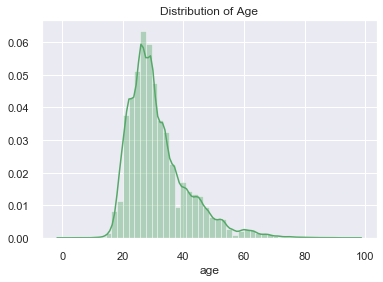

In [118]:
sns.distplot(gender['age'], color ='g')
plt.title('Distribution of Age')
plt.show()

In [119]:
brand.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [120]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [121]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [122]:
brand1=brand.copy()

In [123]:
list_cn = brand1['phone_brand'].unique().tolist()
print(list_cn)

['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯', '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普', '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰', '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔', 'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华', '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新', '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q', '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄', '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派', '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云', '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰', '奥克斯', '西门子', '欧乐迪', 'PPTV']


In [124]:
list_cn_model = brand1['device_model'].unique().tolist()
print(list_cn_model)

['Y13', 'V183', 'R7s', 'A368t', '红米Note2', '红米Note3', 'S5.1', 'Galaxy Grand Prime', 'MI 2S', 'Galaxy Note 2', 'R1C', '大神F1Plus', 'note顶配版', 'Galaxy Mega 2', '星星1号', 'Galaxy S4', 'MI 3', 'Find 7', 'C8816', '红米note', 'X6 L', 'Galaxy Win', '青春版', 'MX3', 'Y35', 'G520-5000', '荣耀4A', '魅蓝Note 2', 'Y560-CL00', '荣耀7i', '3000', '荣耀畅玩4C', 'C730Lw', '红米2A', 'A1', 'One', 'Galaxy J7', 'R3', 'MX2', '荣耀畅玩5', '荣耀7', 'MI 4', 'One M8', '红米1S', '麦芒4', 'Galaxy S6 Edge', 'A3800d', 'P780', 'Ascend G7', '荣耀6', 'Xperia SL', 'Y17T', '荣耀畅玩4X', 'Ascend P7', 'Galaxy Grand 2', '荣耀3X畅玩版', '荣耀X2', 'Ascend P8', 'R2017', '魅蓝NOTE', 'Mate 2', 'M8', 'T87+', 'X710L', 'A890e', 'R7', 'X5M', 'MX5', 'Galaxy Mega 5.8', 'L81', 'Xperia Z1', '荣耀6 Plus', 'X5Max+', 'Galaxy J5', 'Galaxy Note 4', 'A31', 'GN706L', 'G3', 'P8 Lite', 'Sensation XE with Beats Audio Z715e', 'A880', '荣耀+', 'X5L', '8720L', 'IVO 6655', 'R7 Plus', '荣耀畅玩4', 'MX4', 'Y635-TL00', 'Galaxy S3', 'X3L', '3', 'R807', '黄金斗士A8', 'One X', '小米note', 'R6007', 'Galaxy S2 Plus

In [125]:
list_en = ['vivo','Xiaomi','OPPO','Samsung','Cool','Lenovo','Huawei','Qiku','Meizu','Fixun',
       'China Mobile','HTC','Tianyu','Supreme Treasure','LG','Obson','Umi','ZUK','Nubia','HP',
       'Nibiru','Meitu','Xianmi','Motorola','Mengmi','Hammer','Focus','LeTV','Hisense','Baifeng',
       'One Plus','Letter','Haier','Coolby','Newman','Wave','Duowei','Listening Rhyme','TCL','Cupper','Aipal ',
       'LOGO','Shallot','Guomi','ASUS','Onda','Ai Youni','Konka','Yougo','Banghua','Saibo Yuhua',
       'Black Rice','Lovme','Pioneer','E Pie','Shenzhou','Nokia','Pnell','Sugar Gourd','Yitong','European New',
       'Mickey','Cube Rubiks Cube','Blue Devil','Little Poplar','Belfong','Glutinous Rice','Mige','Eren Eben','Simi','Big Q' ,
       'Taipower','Philips','Wei Mi','Da Xian','Changhong','Weitu','Green Orange','Original','Shrimp','Xia Xin','Xiao',
       'Baiga','SUGAR','Ouqi','Century Star','Chi Magnesium','Obi','Kivu','Femtosecond','Desai','Epai',
       'Google','Venus Digital','Guangxin','Noahs Letter','MIL','Bai Mi','Big Cola','Bao Jie Xun','Youyu','Shouyun',
       'Rumi','Rigao','Wopfung','Mole','Fresh Rice','Kellystone','Vibee','Ovo','Fungmi','Hengyufeng ',
       'Aux','Siemens','Oledi','PPTV']

In [126]:
list_en_model = ['Y13','V183','R7s','A368t','Red Rice Note2','Red Rice Note3','S5.1','Galaxy Grand Prime','MI 2S','Galaxy Note 2' ,'R1C','Great God F1Plus','note top version','Galaxy Mega 2','Star 1','Galaxy S4','MI 3','Find 7','C8816','red Mi Note','X6 L','Galaxy Win','Youth Edition','MX3','Y35','G520-5000','Honor 4A','Charm Blue Note 2','Y560-CL00' ,'Honor 7i', '3000','Honor Play 4C','C730Lw','Red Rice 2A','A1','One','Galaxy J7','R3','MX2','Honor Play 5','Honor 7','MI 4','One M8','Red Rice 1S','Maimang 4','Galaxy S6 Edge','A3800d','P780','Ascend G7', 'Honor 6','Xperia SL','Y17T','Honor Play 4X','Ascend P7','Galaxy Grand 2','Honor 3X Play Version','Honor X2','Ascend P8', 'R2017','Charm Blue NOTE','Mate 2','M8','T87+','X710L','A890e','R7','X5M','MX5','Galaxy Mega 5.8', ' L81','Xperia Z1','Honor 6 Plus','X5Max+','Galaxy J5','Galaxy Note 4','A31','GN706L','G3','P8 Lite','Sensation XE with Beats Audio Z715e','A880','Honor+','X5L', '8720L','IVO 6655','R7 Plus','Honor Play 4','MX4','Y635-TL00', ' Galaxy S3','X3L', '3','R807','Golden Fighter A8','One X','Xiaomi note','R6007','Galaxy S2 Plus' ,'R1','Honor 3C','Xiaomi 4C','R823T','Mate 7','MI 2','F2','Galaxy S5','Xperia TX','Galaxy Trend DUOS 2', 'Z1','Y11IT','Red Rice Note Enhanced Edition','Tianjian W900','Ascend G700T','Galaxy Note 3','Galaxy R','F301','Honor Play 5X', ' N1 Mini','Find 5','Red Rice 2','X5Pro','X5V','A11','MI pad','Z7 Mini','Galaxy Note 5','MediaPad M2-801W', 'Galaxy Grand Neo Plus','Ascend GX1','R817','X3T','Galaxy E7','X817','GN700W','Y20T','A680','Y27', '5891', ' Great God F1','UIMI3','Compaq 7','G628','IVO 6622','B199','Galaxy Trend 3','X1ST','S7568I','C8818','Y622','Charm Blue 2','Mate 7 Youth Edition', '1107','Galaxy S2','Le Lemon K3 Note','Galaxy S4 Zoom','Galaxy Ace Dear','Fire Star One','Le Lemon K3' ,'Ascend P1','R831T','M9','U9508','X5Max', '2','X8888','Lenovo Gold Fighter S8','S60t','Great God F2','Xplay3S', 'R1S','Y60-C1','Nexus 5','UIMI4','R809T','Q507T','Moto X Style','A788t','Charm Blue','Y13iL','Glory 6 plus ','G610S','N1T','X1 7.0','Y613F','Galaxy A7','N1','Y23L','Great God F2 Full HD Edition','Inspiration XL','Flagship Edition', 'Y927','Z9 mini','X3S','Y15','R831S','R815T','R81 9T','Galaxy Core Prime','Butterfly','Galaxy Style DUOS','Xperia S','Galaxy Note 3 Lite','P6','S7','Galaxy S6','Nutum Phone', ' M210','S7I','A51','X907','Red Rice','Y33','Super Phone 1 Pro','Galaxy Grand DUOS','Xperia Z5','G620-L75','Chang Enjoy 5','Xplay','MX4 Pro','Galaxy S6 Edge+', '8185','G3588V','Y937','T528t','Galaxy A8','N3','G610T','S7T ','V5 Max','MI One Plus','S90-t','Xperia Z3 mini', '8105', '7270-W00','M8St','Desire 820','A750','S898t ','Charm Blue metal','P970','Galaxy Mega 6.3', '5890','Z9 Max','PRO5','X5SL','Y29L','E602T','GN150', '8190Q' ,'E620M','Super Phone 1', '8702D','Galaxy Grand','Galaxy Note','U960E','Grand X','Xperia arc S','T708','X','T50 ','GN128','Super Phone 1s','L700T','Galaxy A5','F103S', '5951','H1','A820','G7200','Honor U8860','Button', 'LT01','Y11','Y635','Honor Play T1','Xperia Neo','G7 Plus','Y13L','HT-I860', '8056','EVO 3D X515m', 'Red Pepper X1','Galaxy A3','Spring Thunder HD','Galaxy S2 HD LTE E120S','L5Pro','ivvi Little i','Glory Play 4C Sports Edition','Maimang 3','Ascend G700','Xiao Xian 2','Ne xus 4','R827T','G520-0000','Ascend P6','ELIFE E3T','Big 2', '5950','Q519T','Galaxy Tab P6800','A398t','Front Shang','Z5S','Y511-T00','MI One C1', '8085q','A3900','M4','L1 mini','V188S','Great God X7','Grand X Quad' ,'A320t','G2','Galaxy Core Advance','Y28L','Y22IL','Little Apple','SHV-E210L','Lewan','F103','Y928','Galaxy Ace 3','R821T','Great God Note3','MI 2A','Moto X','Y321C','Xperia Z2','I9118', '8750','K860i','G730-C00', ' A708t','A670t','S658t','Galaxy On7','Desire 820 Mini','Galaxy Ace','T1','A33', '603e','LT416','G11','S7568' ,'T528w', '6607','么么哒3N', '8730L','M2','Y11IW','W2015','Fengshang Pro','R830','ELIFE S5.5', ' Q505T', '9190l','Galaxy Note Edge','Touch 2C','Red Pepper','X3F','Y913','Galaxy Trend DUOS','Optimus G', '7296','R5', 'M512','Galaxy On5', '7105','Galaxy S3 Neo+','G520-T10','VIBE X','Mate 8','S1','MI 1S', '5263','S2y ','A369','Grand Memo 2','G750-T20','Y923','M032','R8205','A688t','glory 3X','Samsung big foot','Touch 2', 'Galaxy Premier','Y37','U956 ','S810t','HN3-U01','S650','L128','IPH8','Honor 3C Play Edition', '1100','S5830I','X6 Plus D','G606', 'B9388','Desire 826','A5800-D','Galaxy Core Lite','MI pad 2','A360t','SM-T705C','G4','ono','Find', ' Galaxy Core Max','ivvi Small Bone Pro','A53','G718C','Red Pepper XM','V5S', '3007','D800','X6 Plus','S12','I779', 'Y1','Yuanhang 3','My Prague','Y18L','Blade S6 Lux','H1S','GN715','metal standard version','U879','Desire 7088','U930HD' ,'Galaxy Note 10.1','G3818','Enjoy 5S','U701','X6 D','MediaPad M2-803L','Blade A1','Galaxy Nexus','Desire 610t','Y19T ','Red Chili Note','Feng Shang Max','Galaxy S L', '2016 Galaxy A9','Galaxy S3 Mini','GN152','Desire 816','VIBE X2','A516' ,'S7898','Red Bull V5','Moto X Pro','Y13T', '2016 Galaxy A5','S11T','VIBE Z2','A7', '7270','S6','Xperia C', '7295','Feng Shang 2','V4','M5','H5','R833T','Grand S 2','G510','C8817E', '5263S','Y22L' ,'S820','Y51','Gold Steel','T329t', '7298D','Wildfire S','Galaxy J3','iPh-800','C8815','P335M','S5.5L ', '1105', '8729','T328w','Xperia Z','W2014','Galaxy Mega Plus','G660-L075', '5200S','Y613','Mate S','A298t','Galaxy Tab 3 8.0','T20L','U880F1','Galaxy Galaxy A7 2016', 'X8T','Two','N1 max','Red Rice 3','R820','Little Pepper X3','L920','One S','Ulike2','A376', '8029', 'U707T','Galaxy Win Pro','Z5S Mini','ZenFone Max','E601M','GN708T','Xperia C3','I8268','Galaxy Tab 3 10.1','ZenFone 2', ' Honor Tablet T1-823L','Y600D','S2L','Galaxy Tab 2 P3100', '8122','Y518-T00','V819 3G','D2-M','A580','U3' ,'S720','Xperia acro S','X3V','GN151','X6', '5891Q', '5956','P316L',':UOOGOUT1','Y516','C8816D', '7269 ','Galaxy S7 Edge','U11','SOP M3','A828t','Y3T','Great God Note', '7295C','A850','U705T','A390','Galaxy Tab P3108 ','A789','E1T','A2800d', '7295A Youth Edition','MI 2C','M031','C8813','A199', '795+','E6', '802w', 'Xperia T','D500', '5219','R813T','D350', '8190', '7231','A678t','Galaxy Note 8.0','A380t','A820t', '7372' ,'X1','E1','X1S', '8195','MT1-U06','Y600-U00','S890','HS-U978','H7','Y320','Xperia P ','Galaxy Ace 2','S 920','Q705U','U817','T2','S9','V719','A356','EG939','A388t','R811','V1','L22', '8720' ,'S850t','S3+','V182','M100','P770','iSuper S2','A798t','T9','C8813Q','EG978','Galaxy S Advance', '7620l ', '8702','MI 4S', '8705','T29','Y17W','K68w','Xshot','Ascend G6','G730-T00','GN700T','Big Q Note ','P880','X50TS','M811','X68T','A390t','X6666','Y618-T00','ZenFone 5','IdeaTab A5000-E','Galaxy Ace Plus', 'M1','Galaxy Tab S T705C','Galaxy Tab 4 T231','G730-U00','U809','MI 5','V8','VIBE Z','XL','MOMO9', 'M310','Galaxy Core Mini','GN5001S','么么哒','Y330','Little Pepper M2','IVO 6600','Golden Fighter Note8','Galaxy Trend 2','Mate' , '7295+', '7320','U930','Y300','U7','A660','T3','P308L','U969','Xperia Z Ultra','T91','Hyun Shadow S+','Galaxy Tab 7.0 Plus','M701','A658t','Moto G','P331M','P700i','N798+', '7235','Galaxy S4 Active','E7', 'Xperia Z3','S720i','TAB 2 A7-30','P1', '8085n','S5300','V987','Grand Memo','K1','L7','P520L', 'P700','Galaxy S4 Mini','Wind Hua3','Xperia SP','V70','MT2-C00','Xperia ion', '7268', '5892','G521','M6-M7','TALK 7X quad-core', ' i9','V889D','iSuper S1', '7236','T9108','MM1101','L810','Xperia T2 Ultra','U960S3','Touch 3', '7230','Galaxy Gio ','U9815', '8012','A630t','V818','Galaxy J1','Galaxy Fame','A800','T958','A820e','A278t','N1W','Y500 ','U960S', '9976A','GN100','X805', '8295M','C8817L','A505e', '8198T','GN137','U51GT-W','K900','ME371MG ','A520','J738M','A766', '5860A','R9','S696', '9180','S868t','TALK 9X','Optimus LTE','G615-U10', 'A830','Galaxy Core 4G','Y511-U00','V185', '2016 Galaxy J7','Y80D','Tianjian T1','G716','Galaxy W','R830S', 'Y22','A850+','U795+','R8000','E5','GN9002','E6T','Galaxy J', '5217','Z9','Saturn One','W999' ,'XT615','Y627','Vibe Z2 Pro','Wheat Mang 3S', '8079','Q802T','W2013','BF T18','N910C','E912S', '8295', ' L9','A770e','Q501U','SCH-I939','G6-U00','L1','E3','A698t','A765e','Xperia Z3+ Dual','A3000-H' ,'Y623','G717C','Pegasus','T329d','T862 0','S9T', '3S','ivvi K1 mini','S5831I','Lenovo VIBE X2', '7296S','U966','A785e','T328t','T7','Mighty 3 ','P8max','E70-T','E8','R9 Plus','P306C','One E8','Q503U','Galaxy S2 Epic 4G Touch','P9', '201', 'Droid Ultra','T80','M812C','V955', '3005','Red Chili Pepper Plus Plus','L5 Plus','Galaxy Alpha','S938t','XT1060','U950' ,'A2580','S899t','VS980','U980','C8650','S850','U2','Vibe Shot','Desire 626','X2','Z7 Max','Galaxy Mini','A750e','T619+','S7566','Little Pepper 9','Galaxy Core 2','R805','GN305','C8812','A760','Daguan 4','A399 ','Super Phone Max','Galaxy K Zoom','R5s plus','P332U','N910U','Star 2','Blade S6','V956','Thunder Fighter','EG970' ,'S5.1Pro','MI 1','X80HD','A858t','V526','Y628','G610C','R801','Y3100','Touch 3c','Weiwu 3C', 'F303','One max', '5360','A560', '8021','Galaxy Golden','I9050', '7i','Allure L3','M20-T','E613M', ' G730-L075','Galaxy S Plus', '8085','Z9 mini Elite Edition','Little Pepper S1', '8721','S686','S858t','P705','L8','Small Chili 5','G3609','E75T','Optimus G Pro','Galaxy Tab 3 Lite T111','R817T','T03 Fengzhi Edition','N909','Lewan 2C','GN708W','C630Lw','VT898','One M9+','Nexus S','A7 -30','S930','P70','C230w','Desire 616', '7260','AxonMini', '8712S','GT7','Galaxy Tab 4 T331C','One E9', ' Memeda 3S','N1-Y','Y31','V5','Le Lemon K31','Golden Fighter S8 Play Version','SM-T325','Galaxy Trend','IdeaTab A2207A- H','A318t','U807','XT910','A706','A330e','D520','K860','A8-50','SM-T2558', '8295c','ELIFE E6 mini','A630','Grand Era','TL1000','Z5','S5000','C8813DQ','T9508','R2010','Q201T','N821','idol X', ' DROID RAZR','G6-C00','ELIFE E7 Mini','A5','Ascend D2','V967S','X5','GN168t','YOGA Tablet B6000','G3819D','Galaxy Tab 2 P5110','V6','Y320T','A288t','Touch V','fashion phone','A628t','OKU3','I8258','Galaxy Tab 3 7.0','Defy+', ' P301M', '5872','V9', '8732', '8070','Galaxy Y', '7060','S2','GT-I8160','T967','A3300-T','T5','Tab2 A7-10F','A308t','Galaxy Tab Pro T321','V975s Core4','Desire S','L168','R850','GN705T', '7251','M601', 'U5482','S90-u','Xperia U','U880','D330','C986t','EV5','T528d','G630','A656','S660','T60','Y325','Q7', ' I95', '8089','Galaxy S', '5832','G525','Desire 310','EG966','V10','Great God 1s','GN135','S3','M10-M ','A378t','A889','s820e', '5860S', '8076D', '8017','Butterfly s','M6','Xperia ZR', '608t','GN810','N986 ','Blade C', '7019','N828','S880i','M030','G616-L076','A208t','GN139','VT898S','U939','Q301C', ' Galaxy Ace DUOS','A269i','GN878','One M8 Eye','A238t','VT868','A398t+','Q701C','TS1018','N818','T20', '8707' ,'S8-701u','Desire 5088', '8017-T00','M8x','T327w','GN105','E600M','Xperia ZL', '606w','MK260','memo 5S ','Desire 609d','A3','Desire D516d','T8830Pro','HT-I717','A6800','I630T','T35', '8713','Galaxy Tab S T800', ' E621T','Galaxy Grand Max','Allure L3C','t789','U701T','Nexus 7', '5218S','L70','M3','Q302C','U8825D','V919' ,'One ME','Galaxy Infinite','Y220T','IVO 6688','Y610-U00', '5216D','Little Pepper 4','T820','X920e','L820','S939 ','Xperia Z1 Colorful Edition','T9003','Weike','T21','V95','A860e','V188','S8-701w','S5Q','One M9','voga v1' ,'MM1103','M535', '5261','i1','idol3','G5','S5','T12','A2860','Golden Fighter Youth Edition','P8', '802d ','Red pepper NX Plus','A51kc','T004','BF A500','T1-821w','Sensation Z710E','Xiao Xian 3','Little Star','M5 Plus', ' Galaxy Note 10.1 2014 Edition P601','Galaxy S DUOS','A355e','A30','TL500','Z5 Mini','BM001','A690','A68e','W619','GN106' ,'GT-N8000','EG971','N880F','J320T','EG936D','Desire D516t','T929','I8250','A338t','T327t','N881F','GN180 ', '5316', '5930','S880','MC002','U819','JX8166','A300t', '8717', '9976D','Desire D316d','A805e','KDOOR X5 -Y12','Big 3','S960','X7','Desire HD','E602M','H2', '78P01','A588t','T619', '8150','LT02' ,'M1L','U8', '8712', '2C','M201S','T90','M20-M','SM-T2556','M3S','S6-NT1','A3600d' ,'X98 3G','Little Pepper 6','A606','Q801L','P318L','S860e','T9600','T890','Galaxy Tab P7500','King Kong II','F105' ,'L108','A768t','D557','W800','VIBE P1','L100','R2' ,'ZTE Voyage 3','C03','Axon Sky Machine','OKA51','A385e','Galaxy Tab 2 P5100','N880E','MediaPad 10 Link','XT1033','EG980', ' 210R','U86','Doeasy E700','Q501T','Y310-T10','Y310-5000','S6T','s800','GN108','K88L','U1','Z4 ', '8076', '5311','L930i','Xperia M2','P2','L820c','VT888','U81t','Xperia ZR','I630M','C8813D','Blue Yang 3','Xperia ray','GN9004','Galaxy Grand 2 LTE', '5876','C8812+','D516w','D360','Little Pepper 3','G629','P500M', 'GN800','N2','DM','I639T','PHAB Plus','Galaxy Tab 3 Lite T110','U968','Sonic+','P302C','Nexus 6P', '7605', 'Y70-C','U808','T703','K23','Xuanying 90w','V931','Little Pepper 7','W700','H3','Tab2A7-20F', '8736 ','Mos1','S8-50', '5216s','W88','Ascend G330C','BM002','Drunken Enjoy','MAX3','L5 mini','Craving HD','A358t ','N919D', '5879','E913','V981','Little Pepper M3','Galaxy Tab S T805C','Desire V','I635T','E99','X6088','Optimus G Pro 2','A500', '5310', '7275','P501M','P518L','E260-T','U818','P502U','I900','U880S','Pegasus 3', '7061','BM002-G5','P360W','P21', 'E968','HT-I857','Y523-L176','Leadership Flagship 3','K80','Galaxy Ace 4','L82','Moto X 3','Little Pepper X4', ' V880','i600','U889','F320L','K012','U55GT','Xperia Z5 Premium','A375e', '302U','T00G','L823','C666t', ' EG929','MediaPad M1','W6618','A590','a218t','E956Q','S300','A3500','E50-T','GN705','BM003','A780', 'D1','Q3C','A360e','P305','F1','LT988', '5313S','Red Pepper Note3','Galaxy S7','Xplay5','Desire 816x','S668t ','T9608','IdeaTab A1010-T','W700+', '5200','F240S','M15','T928','Q805T','U970','A396','S90-e' ,'Tianjian W808','J636D+','V923','T13','P51','X10i','E820','GN5002','G9','P9 Plus','A328t', '8715 ','U880E','Tianjian W900S','One A9', '8722','V889M','T780+','N919','Galaxy Core','U793','L855','T9500', 'P3','Grand View Platinum','S560','Xperia J','A3890','G610M','Charm Blue Note3','Hol-U10','Q509T','XT928','X18' ,'A630e','MM1104','I7','A380e','A65','U25GT','Razr V cutting edge','T6','IVO 6666','Z7','S8-303L', '9300-M9','V983','G730-U30','V701s Core4','A366t','V965T','M E7510KG','W2016','One X9','T328d','YOGA Tablet B8000','A100','C986t+','ZenFone Selfie','Discovery of Mars One','P596','S838M' ,'IdeaTab A1000-T','G309T','A780e','DROID RAZR M','VIBE X2 Pro','Moto X pole','A395e','Gigaset ME','Ascend D1','Galaxy Tab P1000','Find 3','U960','G620-L72','T918','U936','I699I','E622M','X80h','B8080-F','Magic Mirror X5' ,'Moto Turbo','A1020','T860','S870e','Little Octopus','Z1988','X98 Air 3G','King 7','King 7s','T621','Y320C' ,'M228-M51','I6','Galaxy S DUOS 2','Le lemon 3','T89-2','m310','H6','Le lemon X3','Pegasus 2 Plus' ,'Galaxy Tab S T705','IVO 8800','U59GT'] 

In [127]:
len(list_cn), len(list_en)

(116, 116)

In [128]:
len(list_cn_model), len(list_en_model)

(1467, 1467)

In [129]:
dict_brand = {} 
for key in list_cn: 
    for value in list_en: 
        dict_brand[key] = value 
        list_en.remove(value) 
        break

In [130]:
print(dict_brand)

{'vivo': 'vivo', '小米': 'Xiaomi', 'OPPO': 'OPPO', '三星': 'Samsung', '酷派': 'Cool', '联想 ': 'Lenovo', '华为': 'Huawei', '奇酷': 'Qiku', '魅族': 'Meizu', '斐讯': 'Fixun', '中国移动': 'China Mobile', 'HTC': 'HTC', '天语': 'Tianyu', '至尊宝': 'Supreme Treasure', 'LG': 'LG', '欧博信': 'Obson', '优米': 'Umi', 'ZUK': 'ZUK', '努比亚': 'Nubia', '惠普': 'HP', '尼比鲁': 'Nibiru', '美图': 'Meitu', '乡米': 'Xianmi', '摩托罗拉': 'Motorola', '梦米': 'Mengmi', '锤子': 'Hammer', '富可视': 'Focus', '乐视': 'LeTV', '海信': 'Hisense', '百立丰': 'Baifeng', '一加': 'One Plus', '语信': 'Letter', '海尔': 'Haier', '酷比': 'Coolby', '纽曼': 'Newman', '波导': 'Wave', '朵唯': 'Duowei', '聆韵': 'Listening Rhyme', 'TCL': 'TCL', '酷珀': 'Cupper', '爱派尔': 'Aipal ', 'LOGO': 'LOGO', '青葱': 'Shallot', '果米': 'Guomi', '华硕': 'ASUS', '昂达': 'Onda', '艾优尼': 'Ai Youni', '康佳': 'Konka', '优购': 'Yougo', '邦华': 'Banghua', '赛博宇华': 'Saibo Yuhua', '黑米': 'Black Rice', 'Lovme': 'Lovme', '先锋': 'Pioneer', 'E派': 'E Pie', '神舟': 'Shenzhou', '诺基亚': 'Nokia', '普耐尔': 'Pnell', '糖葫芦': 'Sugar Gourd', '亿通': 'Yitong', '欧新': 'E

In [131]:
dict_model = {} 
for key in list_cn_model: 
    for value in list_en_model: 
        dict_model[key] = value 
        list_en_model.remove(value) 
        break

In [132]:
dict_model

{'Y13': 'Y13',
 'V183': 'V183',
 'R7s': 'R7s',
 'A368t': 'A368t',
 '红米Note2': 'Red Rice Note2',
 '红米Note3': 'Red Rice Note3',
 'S5.1': 'S5.1',
 'Galaxy Grand Prime': 'Galaxy Grand Prime',
 'MI 2S': 'MI 2S',
 'Galaxy Note 2': 'Galaxy Note 2',
 'R1C': 'R1C',
 '大神F1Plus': 'Great God F1Plus',
 'note顶配版': 'note top version',
 'Galaxy Mega 2': 'Galaxy Mega 2',
 '星星1号': 'Star 1',
 'Galaxy S4': 'Galaxy S4',
 'MI 3': 'MI 3',
 'Find 7': 'Find 7',
 'C8816': 'C8816',
 '红米note': 'red Mi Note',
 'X6 L': 'X6 L',
 'Galaxy Win': 'Galaxy Win',
 '青春版': 'Youth Edition',
 'MX3': 'MX3',
 'Y35': 'Y35',
 'G520-5000': 'G520-5000',
 '荣耀4A': 'Honor 4A',
 '魅蓝Note 2': 'Charm Blue Note 2',
 'Y560-CL00': 'Y560-CL00',
 '荣耀7i': 'Honor 7i',
 '3000': '3000',
 '荣耀畅玩4C': 'Honor Play 4C',
 'C730Lw': 'C730Lw',
 '红米2A': 'Red Rice 2A',
 'A1': 'A1',
 'One': 'One',
 'Galaxy J7': 'Galaxy J7',
 'R3': 'R3',
 'MX2': 'MX2',
 '荣耀畅玩5': 'Honor Play 5',
 '荣耀7': 'Honor 7',
 'MI 4': 'MI 4',
 'One M8': 'One M8',
 '红米1S': 'Red Rice 1S',
 '麦

In [133]:
brand1['phonebrand_en']= brand1['phone_brand'].map(dict_brand) 
brand1.head()

,device_id,phone_brand,device_model,phonebrand_en
0,1877775838486905855,vivo,Y13,vivo
1,-3766087376657242966,小米,V183,Xiaomi
2,-6238937574958215831,OPPO,R7s,OPPO
3,8973197758510677470,三星,A368t,Samsung
4,-2015528097870762664,小米,红米Note2,Xiaomi


In [134]:
brand1['model_en']= brand1['device_model'].map(dict_model) 
brand1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 5 columns):
device_id        87726 non-null int64
phone_brand      87726 non-null object
device_model     87726 non-null object
phonebrand_en    87726 non-null object
model_en         87726 non-null object
dtypes: int64(1), object(4)
memory usage: 3.3+ MB


In [135]:
brand1.head()

,device_id,phone_brand,device_model,phonebrand_en,model_en
0,1877775838486905855,vivo,Y13,vivo,Y13
1,-3766087376657242966,小米,V183,Xiaomi,V183
2,-6238937574958215831,OPPO,R7s,OPPO,R7s
3,8973197758510677470,三星,A368t,Samsung,A368t
4,-2015528097870762664,小米,红米Note2,Xiaomi,Red Rice Note2


In [136]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [137]:
events2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 3 to 3252949
Data columns (total 7 columns):
event_id     534462 non-null float64
device_id    534462 non-null float64
timestamp    534462 non-null datetime64[ns]
longitude    534462 non-null float64
latitude     534462 non-null float64
city         534462 non-null object
state        534462 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 52.6+ MB


### Merging the datasets

In [138]:
brand2= brand1.copy()

In [139]:
gender1= gender.copy()

In [140]:
brand2['device_id']=brand2['device_id'].astype(float)

In [141]:
gender1['device_id']=gender1['device_id'].astype(float)

In [142]:
df_merge1=pd.merge(events2,brand2,on='device_id',how='left')
df_merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 0 to 534461
Data columns (total 11 columns):
event_id         534462 non-null float64
device_id        534462 non-null float64
timestamp        534462 non-null datetime64[ns]
longitude        534462 non-null float64
latitude         534462 non-null float64
city             534462 non-null object
state            534462 non-null object
phone_brand      534462 non-null object
device_model     534462 non-null object
phonebrand_en    534462 non-null object
model_en         534462 non-null object
dtypes: datetime64[ns](1), float64(4), object(6)
memory usage: 48.9+ MB


In [143]:
df_merge2=pd.merge(df_merge1,gender1,on='device_id',how='left')
df_merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 0 to 534461
Data columns (total 14 columns):
event_id         534462 non-null float64
device_id        534462 non-null float64
timestamp        534462 non-null datetime64[ns]
longitude        534462 non-null float64
latitude         534462 non-null float64
city             534462 non-null object
state            534462 non-null object
phone_brand      534462 non-null object
device_model     534462 non-null object
phonebrand_en    534462 non-null object
model_en         534462 non-null object
gender           534462 non-null object
age              534462 non-null int64
group            534462 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 61.2+ MB


In [144]:
df_merge2.sample(50)

,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,phonebrand_en,model_en,gender,age,group
293037,2036986.0,6.503544e+18,2016-05-04 23:46:39,80.308924,13.168878,Chennai,TamilNadu,联想,Q802T,Lenovo,Q802T,M,24,M23-26
255657,2097439.0,-4.792366e+18,2016-05-01 14:55:00,80.309010,13.114228,Chennai,TamilNadu,小米,红米,Xiaomi,Red Rice,M,43,M39+
103138,1927487.0,6.020090e+18,2016-05-04 09:03:57,80.280900,13.082858,Madhavaram,TamilNadu,魅族,MX3,Meizu,MX3,F,31,F29-32
527753,2442385.0,3.548667e+18,2016-05-02 03:18:25,80.363465,13.155394,Chennai,TamilNadu,酷比,S2,Coolby,S2,M,24,M23-26
268446,2857395.0,5.536513e+18,2016-05-02 15:27:22,80.359796,13.128174,Chennai,TamilNadu,小米,红米2,Xiaomi,Red Rice 2,M,32,M32-38
162201,2049230.0,-3.402916e+18,2016-05-04 10:11:17,77.942710,11.439430,Tiruchengode,TamilNadu,vivo,Xperia Z2,vivo,Xperia Z2,M,23,M23-26
80945,3025241.0,4.538913e+18,2016-05-04 23:16:39,77.400820,10.089353,Bodinayakkanur,TamilNadu,HTC,Desire 626,HTC,Desire 626,M,26,M23-26
188427,2359821.0,-7.621652e+18,2016-05-07 21:46:43,80.325813,13.176372,Chennai,TamilNadu,vivo,X5M,vivo,X5M,M,34,M32-38
448722,2703610.0,-6.927053e+18,2016-05-07 15:22:13,79.948227,27.125837,Kannauj,UttarPradesh,华为,荣耀畅玩4X,Huawei,Honor Play 4X,M,32,M32-38
260964,429763.0,-5.859968e+18,2016-05-02 20:23:46,80.318581,13.176691,Chennai,TamilNadu,三星,Galaxy Note 2,Samsung,Galaxy Note 2,M,26,M23-26


In [173]:
events['state'].isin(['TamilNadu']).count()

3252950